In [101]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../raw_data/tweets_cleaned',names=['tweets','label'],skiprows=1)
df.tail()

,tweets,label
4621,lose anger anxieti insecur depress medit buddh...,1
4622,anisalukman baik aja mani secret amp lie kalo ...,0
4623,pan ghey friend lean leftist side polit medic ...,1
4624,amarieb eeee nacho glasvega bad eh,0
4625,think go hit amp meat groceri store crazi hang...,0


In [3]:
df.shape

(4626, 2)

In [4]:
df['label'].value_counts()

1    2313
0    2313
Name: label, dtype: int64

In [5]:
df = df.dropna()

# Model

In [6]:
X = df['tweets']
y = df['label']

In [7]:
[X.values]

[array(['stormeranna life gener depress anxieti futur',
        'kellyclarkson amaz much depress parent divorc music help lot music empow mayb write one inner struggl abl dri tear find someon chang life need like',
        'sooooooo happppi pupppyy offici potti train also mom bought appl jack last night soo start day right',
        ...,
        'pan ghey friend lean leftist side polit medic depress showin face without makeup yall think itll',
        'amarieb eeee nacho glasvega bad eh',
        'think go hit amp meat groceri store crazi hangov achiev'],
       dtype=object)]

In [8]:
X.values[3800]

'fri happi food tweet sg'

In [9]:
X.isnull().sum()

0

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Create Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_df = 0.8, ngram_range=(1, 2))),
    ('nb', MultinomialNB(alpha=1.0)),
])

pipeline

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.8, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [11]:
X

0            stormeranna life gener depress anxieti futur
1       kellyclarkson amaz much depress parent divorc ...
2       sooooooo happppi pupppyy offici potti train al...
3       today girl two month day feel like way fuckin ...
4       one mini poem helenswritingmentalhealthdepress...
                              ...                        
4621    lose anger anxieti insecur depress medit buddh...
4622    anisalukman baik aja mani secret amp lie kalo ...
4623    pan ghey friend lean leftist side polit medic ...
4624                   amarieb eeee nacho glasvega bad eh
4625    think go hit amp meat groceri store crazi hang...
Name: tweets, Length: 4618, dtype: object

In [12]:
cross_val_score(estimator=pipeline,
               X=X,
               y=y,
               scoring='f1',
               cv=5,
               n_jobs=-1).mean()

0.9167059795764129

## Model Parameters

In [13]:
tfid3 = TfidfVectorizer(ngram_range=(1,2))
nb3 = MultinomialNB(alpha = 1.0)

In [14]:
tfid3.fit(X)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [15]:
vector3 = tfid3.transform(X)

In [16]:
tfid3.get_feature_names()

['aa',
 'aa poc',
 'aaa',
 'aaa shooter',
 'aaaa',
 'aaaa realli',
 'aaaaaaaand',
 'aaaaaaaand back',
 'aaaaaah',
 'aaaaaah officialquest',
 'aaaaaand',
 'aaaaaand depress',
 'aaaaargh',
 'aaaaargh also',
 'aaaaayyyyy',
 'aaaaayyyyy momma',
 'aaaah',
 'aaaah babi',
 'aaaawwwwww',
 'aaaawwwwww love',
 'aaah',
 'aaah see',
 'aaahhhh',
 'aaahhhh hypocrisi',
 'aabc',
 'aaca',
 'aacebad',
 'aaron',
 'aaron dor',
 'aaron right',
 'aawjti',
 'aawjti ocid',
 'ab',
 'ab challeng',
 'ab gp',
 'ab may',
 'ab month',
 'abandon',
 'abandon heartbroken',
 'abat',
 'abat depress',
 'abatevintag',
 'abatevintag fleurchipbowl',
 'abatevintag list',
 'abbey',
 'abbey church',
 'abbey year',
 'abbi',
 'abbi bestieessss',
 'abbrevi',
 'abbrevi sr',
 'abbuffata',
 'abbuffata cab',
 'abcacffcaeecd',
 'abdul',
 'abdul coolin',
 'abdulla',
 'abdulla shaikh',
 'abe',
 'abe lincoln',
 'abeautyhealthi',
 'abeautyhealthi www',
 'abel',
 'abel love',
 'abil',
 'abil accessal',
 'abil manag',
 'abil think',
 'abl',

In [17]:
nb3.fit(vector3, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
nb3.coef_

array([[-10.83882374, -10.83237508, -10.8227035 , ..., -10.86929887,
        -10.79040235, -10.79040235]])

In [19]:
coefs = pd.Series(nb3.coef_[0], index = tfid3.get_feature_names())

In [20]:
coefs.sort_values()

lol know        -10.981609
phlippin        -10.981609
phlippin love   -10.981609
flavor quot     -10.981609
flavor          -10.981609
                   ...    
face             -7.848994
pic              -7.618340
emoji            -7.511419
anxieti          -7.323297
depress          -6.074262
Length: 47971, dtype: float64

# Train the model including Reddit posts

## Import data

In [28]:
df = pd.read_csv('../raw_data/twitter_reddit_text.csv',names=['text','label'],skiprows=1)
df.isnull().sum()

text     10
label     0
dtype: int64

In [29]:
df = df.dropna()

In [130]:
df['label'].value_counts()

1    12679
0    12679
Name: label, dtype: int64

## Holdout Method

In [137]:
from sklearn.model_selection import train_test_split

X = df['text'].values
y= df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

## Model

In [37]:
cross_val_score(estimator=pipeline,
               X=X_train,
               y=y_train,
               scoring='f1',
               cv=5,
               n_jobs=-1).mean()

0.8755270587177378

## Grid Search

In [38]:
from sklearn.model_selection import GridSearchCV

pipeline.get_params()

{'memory': None,
 'steps': [('tfidf',
   TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                   dtype=<class 'numpy.float64'>, encoding='utf-8',
                   input='content', lowercase=True, max_df=1.0, max_features=None,
                   min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                   smooth_idf=True, stop_words=None, strip_accents=None,
                   sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                   tokenizer=None, use_idf=True, vocabulary=None)),
  ('nb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
 'verbose': False,
 'tfidf': TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                 dtype=<class 'numpy.float64'>, encoding='utf-8',
                 input='content', lowercase=True, max_df=1.0, max_features=None,
                 min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                 smooth_idf=True, stop_words=None,

In [66]:
params = {
    'tfidf__max_df': [0.7,0.8,0.9,1.0],
    'tfidf__max_features': [None,10,100,1000,5000],
    'tfidf__ngram_range': [(1,1),(1,2),(2,2)]
}

search = GridSearchCV(estimator=pipeline,
                     n_jobs=-1,
                     scoring='f1',
                     param_grid=params)

search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                      

In [67]:
search.best_params_

{'tfidf__max_df': 0.7,
 'tfidf__max_features': 5000,
 'tfidf__ngram_range': (1, 2)}

In [68]:
search.best_score_

0.9334691107627991

In [69]:
best_model = search.best_estimator_

In [80]:
best_model.score(X_train,y_train)

0.9449014084507042

In [70]:
y_pred = best_model.predict(X_test)

In [71]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

f1_score(y_test,y_pred)

0.9343287359230672

In [72]:
roc_auc_score(y_test,y_pred)

0.931619716032213

## Model parameters

In [113]:
tfid3 = TfidfVectorizer(ngram_range=(1,2), max_features=10000, max_df=0.7)
nb3 = MultinomialNB()

tfid3.fit(X_train)

vector3 = tfid3.transform(X_train)

nb3.fit(vector3, y_train)

coefs = pd.Series(nb3.coef_[0], index = tfid3.get_feature_names())

coefs.sort_values(ascending=False).head(30)

feel        -4.980915
depress     -5.009774
like        -5.227683
want        -5.333743
life        -5.548030
get         -5.556344
know        -5.612004
go          -5.631488
can         -5.728632
not         -5.729611
can not     -5.729937
time        -5.831193
even        -5.834412
feel like   -5.840599
peopl       -5.847394
thing       -5.924690
day         -5.938678
realli      -5.943600
would       -5.957292
think       -5.963733
tri         -5.968485
friend      -5.978202
help        -5.979301
year        -5.980429
make        -6.004084
one         -6.033744
fuck        -6.089638
work        -6.122084
never       -6.200036
much        -6.232740
dtype: float64

In [115]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

vector4 = tfid3.transform(X_test)

y_pred = best_model.predict(X_test)

recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)

print(f"Recall: {recall}")
print(f"Precision: {precision}")

Recall: 0.9659863945578231
Precision: 0.9046802254349424


## Optimize max_features

In [108]:
def tune_model(max_features_list):
    train_scores = []
    test_scores = []
    
    for max_features in max_features_list:
        tfid3 = TfidfVectorizer(ngram_range=(1,2),
                                max_features=max_features,
                                max_df=0.7)

        nb3 = MultinomialNB()

        tfid3.fit(X_train)

        vector3 = tfid3.transform(X_train)

        nb3.fit(vector3, y_train)

        train_score = nb3.score(vector3, y_train)
        train_scores.append(train_score)

        vector4 = tfid3.transform(X_test)
        y_pred = nb3.predict(vector4)

        test_score = roc_auc_score(y_test,y_pred)
        test_scores.append(test_score)
        
    return train_scores, test_scores


max_features_list = range(1000,30000,1000)

train_scores, test_scores = tune_model(max_features_list)

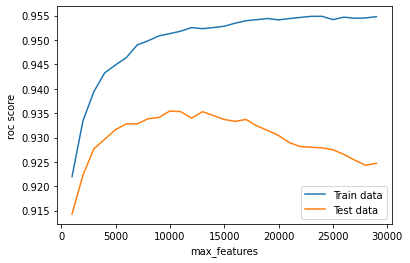

In [109]:
import matplotlib.pyplot as plt

plt.plot(list(max_features_list), train_scores, label='Train data')
plt.plot(list(max_features_list), test_scores, label='Test data')
plt.xlabel('max_features')
plt.ylabel('roc score')
plt.legend()

In [111]:
max_features_list = list(max_features_list)

max_features_optimized = max_features_list[np.array(test_scores).argmax()]
max_features_optimized

10000

**Se observa que el modelo comienza a "Overfitear" a partir de 10000 max_features**

In [117]:
def tune_model(ngram_ranges):
    train_scores = []
    test_scores = []
    
    for ngram_range in ngram_ranges:
        tfid3 = TfidfVectorizer(ngram_range=ngram_range,
                                max_features=10000,
                                max_df=0.7)

        nb3 = MultinomialNB()

        tfid3.fit(X_train)

        vector3 = tfid3.transform(X_train)

        nb3.fit(vector3, y_train)

        train_score = nb3.score(vector3, y_train)
        train_scores.append(train_score)

        vector4 = tfid3.transform(X_test)
        y_pred = nb3.predict(vector4)

        test_score = roc_auc_score(y_test,y_pred)
        test_scores.append(test_score)
        
    return train_scores, test_scores


ngram_ranges = [(1,1),(1,2),(1,3),(2,2),(2,3),(3,3)]

train_scores, test_scores = tune_model(ngram_ranges)

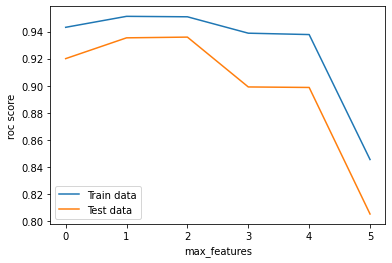

In [118]:
plt.plot(train_scores, label='Train data')
plt.plot(test_scores, label='Test data')
plt.xlabel('max_features')
plt.ylabel('roc score')
plt.legend()

# Classification report

In [121]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      3786
           1       0.90      0.97      0.93      3822

    accuracy                           0.93      7608
   macro avg       0.93      0.93      0.93      7608
weighted avg       0.93      0.93      0.93      7608



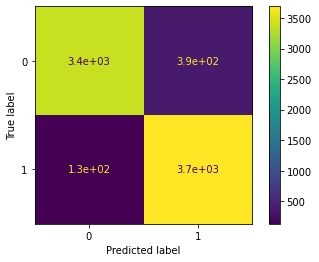

In [126]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(estimator=best_model,
                     X=X_test,
                     y_true=y_test)

In [129]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[3397,  389],
       [ 130, 3692]])